In [2]:
import pandas as pd
import numpy as np
import os

In [9]:
#Setting the directory
os.chdir(r'C:\Users\Hp\Desktop\Unit Level Data\NSS75')

In [10]:
# initializing string
# test_str: String that needed to be split
# cus_lens: customized length of substrings after splitting

def nsso_splitter (test_str, cus_lens):
    res = []
    strt = 0
    for size in cus_lens:
        res.append(test_str[strt : strt + size])
        strt += size
    return res

# Demographic Data

In [11]:
with open('R75252L04.txt') as f:
    lines = f.readlines()

In [12]:
# Mapping substr_length with col names
Col_Mapping = pd.read_excel('column_mapping.xls')

In [13]:
col_names=Col_Mapping['Item'].tolist()
col_length=Col_Mapping['Length'].tolist()

In [22]:
Dem_HH=pd.DataFrame(lines)
Dem_HH.columns=['Whole_String']
Dem_HH['New_String']=Dem_HH['Whole_String'].apply(lambda x:nsso_splitter(x,cus_lens = col_length))

In [23]:
for i in range(len(col_names)):
    Dem_HH[col_names[i]]=Dem_HH['New_String'].apply(lambda x: x[i])

In [38]:
Dem_HH=Dem_HH[['Centre, Round', 'FSU Serial No.',
       'Round', 'Schedule', 'Sample', 'Sector', 'NSS-Region', 'District',
       'Stratum', 'Sub-stratum', 'Sub-Round', 'Sub-sample', 'FOD-Sub-Region',
       'Hamlet group/ Sub-block no.', 'Second-stage-stratum no.',
       'Sample hhld. No.', 'Level', 'Filler', 'Person serial no.',
       'Relation to head', 'Gender', 'Age(in years)', 'Marital status',
       'Education level: general', 'Education level: technical',
       'For codes 06, 07, 08, 10 to 16 in col.7: class/grade completed',
       'For codes 06, 07, 08, 10 to 16 in col.7: year(s ) of education completed after the class/grade recorded in col.9',
       'For persons of age 3 to 35 years status of enrolment',
       'For persons of age 5 years and above: whether able to operate a computer',
       'For persons of age 5 years and above: whether able to use internet',
       'For persons of age 5 years and above: whether used internet during last 30 days',
       'For persons of age 12 to 59 years, whether receiving/received any vocational/technical training',
       'Whether having certificate of disability',
       'If 1 in col. 16, type of disability as per the certificate',
       'NSS', 'NSC', 'MULT']]

In [43]:
#Dem_HH.to_csv('Dem_HH.csv')

In [109]:
#import pyreadstat    
#ID_HH, meta1 = pyreadstat.read_dta('R75252L01 -(Blocks 1, 2 and 11)- Identification of sample household.dta')
#HH_Char,meta2=pyreadstat.read_dta('R75252L02 (Block 3)-household characteristics.dta')
#MemHH_3_35, meta3=pyreadstat.read_dta('R75252L03 (Block-3.dta')
#Dem_HH, meta4=pyreadstat.read_dta('R75252L04 (Block-4)-Demographic and other particulars of household members.dta')
#EduDetail_3_35, meta5=pyreadstat.read_dta('R75252L05 (Block-5)-Dducation particulars on basic course of the persons of age 3 to 35 years who are currently attending education.dta')
#Expend_3_35,meta6=pyreadstat.read_dta('R75252L06 (Block 6)-Particulars of expenditure (Rs.dta')
#NotAtt_3_35,meta7=pyreadstat.read_dta('R75252L07 (Block 7)-Particulars of currently not attending persons of age 3 to 35 years.dta')
#Voc_Tech_details,meta8=pyreadstat.read_dta('R75252L08 (Block 8)-particulars of formal vocational or technical training received by household members of age 12 to 59 years.dta')

# Changing gender and sector code to actual names:

In [45]:
def gender(x):
    if x=="1":
        return 'Male'
    if x=='2':
        return 'Female'
    else:
        return 'Transgender'

In [46]:
def sector(x):
    if x=="1":
        return 'Rural'
    if x=='2':
        return 'Urban'

In [47]:
Dem_HH['Gender']=Dem_HH['Gender'].apply(lambda x: gender(x))
Dem_HH['Sector']=Dem_HH['Sector'].apply(lambda x: sector(x) )

# 3.1 Indicators relating to households and population

In [53]:
#Creating Mult_Combined
def  create_Mult_Combined(x,y,z):
    if x==y:
        return z/100
    else:
        return z/200
        

In [64]:
Dem_HH['MULT']=Dem_HH['MULT'].astype(int)
Dem_HH['MULT_Combined']= Dem_HH.apply(lambda x: create_Mult_Combined(x['NSS'], x['NSC'],x['MULT']),axis=1)

In [52]:
#Creating Person Level ID
Dem_HH['PLID']=Dem_HH['FSU Serial No.']+ Dem_HH['Hamlet group/ Sub-block no.'] + Dem_HH['Second-stage-stratum no.'] + Dem_HH['Sample hhld. No.'] + Dem_HH['Person serial no.']


# Published and Estimated Figure

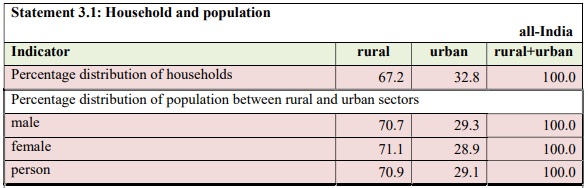

In [65]:
#gender_sector wise
Dem_Gender_Sector=(Dem_HH.groupby(['Gender','Sector'])['MULT_Combined'].sum()*100/Dem_HH.groupby(['Gender'])['MULT_Combined'].sum()).reset_index(name = 'Percentage')
Dem_Gender_Sector

,Gender,Sector,Percentage
0,Female,Rural,71.115560
1,Female,Urban,28.884440
2,Male,Rural,70.690764
3,Male,Urban,29.309236
4,Transgender,Rural,58.096551
5,Transgender,Urban,41.903449


In [67]:
#age 3 to 35 distribution

In [70]:
Dem_HH['Age(in years)']=Dem_HH['Age(in years)'].replace('  ',np.nan).astype(float)

In [71]:
def ind_335(x):
    if (x >=3) & (x<=35):
        return 1
    else:
        return 0

In [73]:
Dem_HH['Ind_Age335']=Dem_HH['Age(in years)'].apply(lambda x :ind_335(x) )

In [91]:
#age 3 to 35 distribution

# 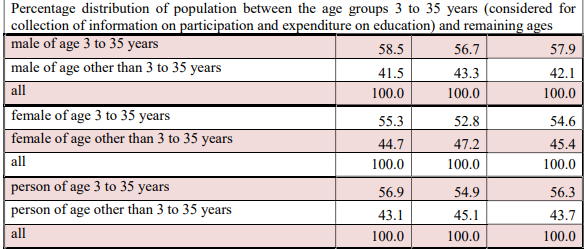

In [ ]:
#age 3 to 35 distribution

Dem_Gender_Sector_3_35=(Dem_HH.groupby(['Gender','Sector', 'Ind_Age335'])['MULT_Combined'].sum()*100/Dem_HH.groupby(['Gender','Sector'])['MULT_Combined'].sum()).reset_index(name = 'Percentage')
Dem_Gender_Sector_3_35

# 3.2 Indicators relating to literacy, status of education and vocational/technical training 


In [77]:
Dem_HH['educated_not_educated']=Dem_HH['Education level: general'].apply(lambda x : 'Not_Literate' if x =='01' else 'Literate')

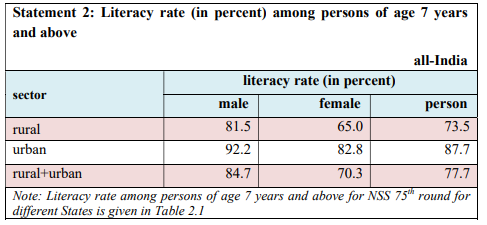

In [79]:
#age 3 to 35 distribution
literacy_rate_above7=(Dem_HH[Dem_HH['Age(in years)']>=7].groupby(['Gender','Sector','educated_not_educated'])['MULT_Combined'].sum()*100/Dem_HH[Dem_HH['Age(in years)']>=7].groupby(['Gender','Sector'])['MULT_Combined'].sum()).reset_index(name = 'Percentage')
literacy_rate_above7

,Gender,Sector,educated_not_educated,Percentage
0,Female,Rural,Literate,65.021453
1,Female,Rural,Not_Literate,34.978547
2,Female,Urban,Literate,82.849025
3,Female,Urban,Not_Literate,17.150975
4,Male,Rural,Literate,81.456912
5,Male,Rural,Not_Literate,18.543088
6,Male,Urban,Literate,92.250046
7,Male,Urban,Not_Literate,7.749954
8,Transgender,Rural,Literate,39.686844
9,Transgender,Rural,Not_Literate,60.313156


In [81]:
def highest_level_of_eduction(x):
    if x=='01':
        return 'Not_Literate'
    if x in ['14','15','16']:
        return 'graduate and above'
    if x  in ['02','03','04','05','06','07']:
        return 'Literate upto primary'
    if x =='08':
        return 'Middle'
    if x in ['10','12']:
        return 'Secondary'
    if x in ['11','13']:
        return 'higher secondary'

In [82]:
Dem_HH['highest_level_of_eduction']=Dem_HH['Education level: general'].apply(lambda x : highest_level_of_eduction(x))

# Published Figure

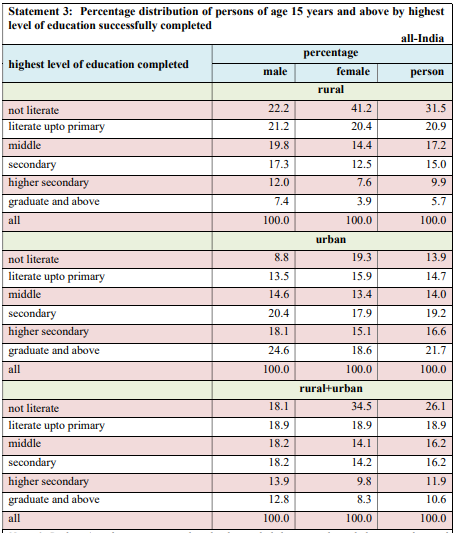

In [83]:
#3.2.2
#age 15 above
Hig_ed_comp=(Dem_HH[Dem_HH['Age(in years)']>=15].groupby(['Gender','Sector','highest_level_of_eduction'])['MULT_Combined'].sum()*100/Dem_HH[Dem_HH['Age(in years)']>=15].groupby(['Gender','Sector'])['MULT_Combined'].sum()).reset_index(name = 'Percentage')
Hig_ed_comp

,Gender,Sector,highest_level_of_eduction,Percentage
0,Female,Rural,Literate upto primary,20.446272
1,Female,Rural,Middle,14.371276
2,Female,Rural,Not_Literate,41.183160
3,Female,Rural,Secondary,12.586778
4,Female,Rural,graduate and above,3.859354
5,Female,Rural,higher secondary,7.553159
6,Female,Urban,Literate upto primary,15.842705
7,Female,Urban,Middle,13.395835
8,Female,Urban,Not_Literate,19.284512
9,Female,Urban,Secondary,17.837796


# 3.2.3 Average number of years in formal education

In [86]:
Dem_HH['Completed_class_grade']=Dem_HH['For codes 06, 07, 08, 10 to 16 in col.7: class/grade completed'].replace('  ',np.nan).astype(float)
Dem_HH['Completed_class_grade']=Dem_HH['Completed_class_grade'].replace(99,0)
Dem_HH['Edu_completed_inYrs']=Dem_HH['For codes 06, 07, 08, 10 to 16 in col.7: year(s ) of education completed after the class/grade recorded in col.9'].replace('  ',0).astype(float)
Dem_HH['Total_Edu_Yrs']=Dem_HH['Edu_completed_inYrs'] + Dem_HH['Completed_class_grade']
Dem_HH['Wtd_Total_Edu_Yrs']=Dem_HH['Total_Edu_Yrs']*Dem_HH['MULT_Combined']


# Published figure for Average number of years completed in formal education for age 15 and above and For age 25 and above

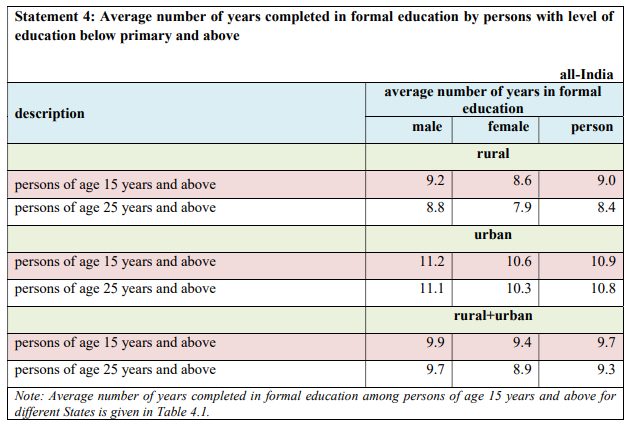

In [87]:
#For age 15 and above
Avg_Year_Education_15=(Dem_HH[(Dem_HH['Age(in years)']>=15) & (Dem_HH['Wtd_Total_Edu_Yrs']>0)].groupby(['Gender','Sector'])['Wtd_Total_Edu_Yrs'].sum()/Dem_HH[(Dem_HH['Age(in years)']>=15) & (Dem_HH['Wtd_Total_Edu_Yrs']>0)].groupby(['Gender','Sector'])['MULT_Combined'].sum()).reset_index(name = 'Average')
Avg_Year_Education_15

,Gender,Sector,Average
0,Female,Rural,8.613543
1,Female,Urban,10.625331
2,Male,Rural,9.232859
3,Male,Urban,11.159006
4,Transgender,Rural,5.893920
5,Transgender,Urban,11.645115


In [88]:
#For age 25 and above
Avg_Year_Education_25=(Dem_HH[(Dem_HH['Age(in years)']>=25) & (Dem_HH['Wtd_Total_Edu_Yrs']>0)].groupby(['Gender','Sector'])['Wtd_Total_Edu_Yrs'].sum()/Dem_HH[(Dem_HH['Age(in years)']>=25) & (Dem_HH['Wtd_Total_Edu_Yrs']>0)].groupby(['Gender','Sector'])['MULT_Combined'].sum()).reset_index(name = 'Average')
Avg_Year_Education_25

,Gender,Sector,Average
0,Female,Rural,7.893387
1,Female,Urban,10.345319
2,Male,Rural,8.811459
3,Male,Urban,11.135246
4,Transgender,Rural,9.641312
5,Transgender,Urban,11.296558
